# Project  3:   Data Findings/ Report / Dataset of  Ford GoBike System
By: Kareem Beltagy

In this  report, I will start by looking  at the data  distributions and the portions of the users, Then I will continue with the features  affecting the counts of the  bike rides. Then I will  look at  the fetures theat affects the  duration of the  trip.

In [1]:
#importing the necessary libraries   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#disabling the python  warnings in the  slide deck
import warnings
warnings.simplefilter("ignore")
# Reading the  data 
bikes=pd.read_csv('fordbike.csv')
bikes.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [2]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# Data cleansing :


In [3]:
#problem: having missing values
#solution: dropping  all the  nulls
bikes.dropna(inplace=True)
bikes.isnull().sum().sum()

0

In [4]:
#problem: changing the data type of  some columns  to the  right  type
#making  copy of the dataset  first 
bikes1=bikes.copy()
#changing the  start and  end times  to  type datetime
bikes1['start_time'] = pd.to_datetime(bikes1['start_time'])
bikes1['end_time'] = pd.to_datetime(bikes1['end_time'])

#changing the  user  type and member  gender into  type category  to be  easy  to  visualize later
bikes1['user_type'] = bikes1['user_type'].astype('category')
bikes1['member_gender'] = bikes1['member_gender'].astype('category')

In [5]:
#problem: adding  new data  columns to the  data frame
bikes1['duration_min']=bikes1['duration_sec']/60
bikes1['age']=2021-bikes1['member_birth_year']
bikes1['age']=bikes1['age'].astype('int')
bikes1.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,62


In [6]:
# adding  new  columns  of the start hour, day, month
bikes1['start_date'] = bikes1.start_time.dt.strftime('%Y-%m-%d')
bikes1['start_hour'] = bikes1.start_time.dt.strftime('%H')
bikes1['start_day'] = bikes1.start_time.dt.strftime('%A')
bikes1['start_month'] = bikes1.start_time.dt.strftime('%B')

#   the  distribution of the   duration  is  right-skewed and we need to  do a log transformation  to make it  normally distributed

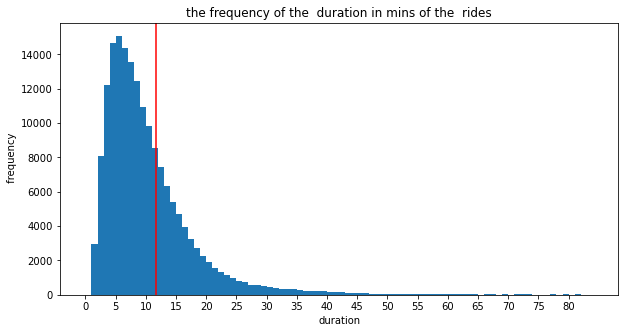

In [7]:
#showing the frequency of the  duration in mins of the  rides/ before the log transformation
plt.figure(figsize=(10,5))
bins=np.arange(0,85,1)
ticks=np.arange(0,85,5)
color=sb.color_palette()[0]
plt.hist(data=bikes1,x='duration_min',color=color,bins=bins)
plt.axvline(bikes1['duration_min'].mean(),color='r')
plt.xticks(ticks)
plt.xlabel('duration')
plt.ylabel(' frequency')
plt.title('the frequency of the  duration in mins of the  rides');

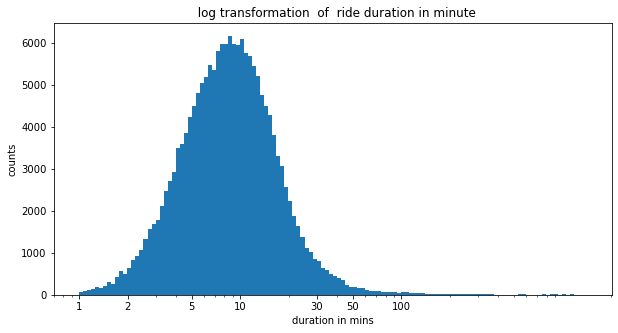

In [8]:
# duration  distribution  after the log transformation
bin_size = 0.025
bins = 10 ** np.arange(0, np.log10(bikes1['duration_min'].max())+bin_size, bin_size)

plt.figure(figsize=[10, 5]);
plt.hist(data = bikes1, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10,30, 50, 100], [1, 2, 5, 10, 30, 50, 100]);
plt.xlabel('duration in mins');
plt.ylabel('counts');
plt.title("  log transformation  of  ride duration in minute");

This plot shows the log transformation  of the  ride  duration in minuutes  in order to make the  plot normally distributed

#  portions of the users  according  to   usertype,gender,starting  hour, and  starting day  features

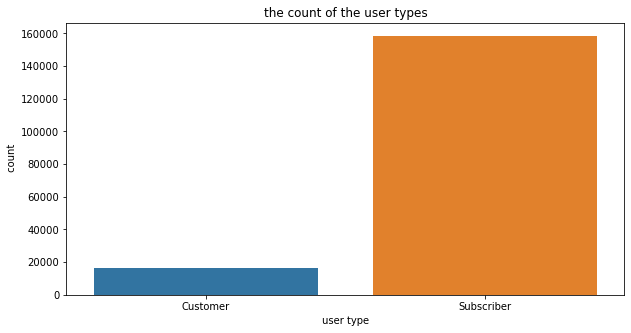

In [9]:
#the count of the user types
plt.figure(figsize=(10,5))
sb.countplot(data=bikes1, x='user_type')
plt.xlabel('user type')
plt.ylabel(' count')
plt.title('the count of the user types');

this plot shows that the majority of the users making  rides are of the  subscriber  type

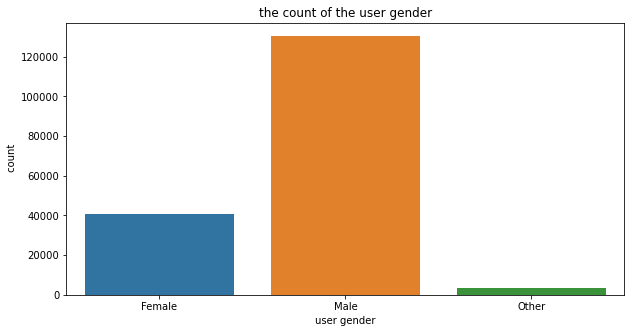

In [10]:
# the  total trips made based on gender
plt.figure(figsize=(10,5))
sb.countplot(data=bikes1, x='member_gender')
plt.xlabel('user gender')
plt.ylabel(' count')
plt.title('the count of the user gender');

most of the  users making  bike rides are  males

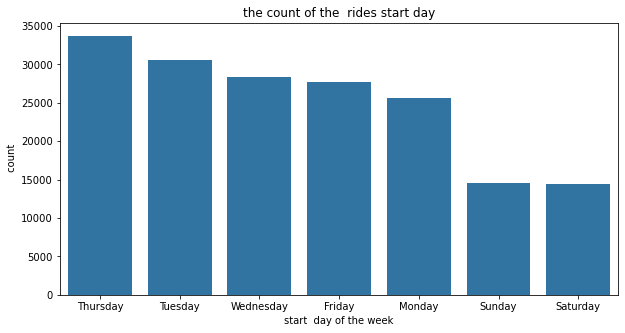

In [11]:
# the  rides  started  in every day of the week
plt.figure(figsize=(10,5))
freq = bikes1['start_day'].value_counts()

# Get the indexes of the Series to use ffor ordering  the bars
gen_order = freq.index
sb.countplot(data=bikes1, x='start_day', color=color,order=gen_order)
plt.xlabel('start  day of the week')
plt.ylabel(' count')
plt.title('the count of the  rides start day');

Thursday contains most of the rides  throughout the week  and the weekends  have the  min number of  rides in the week

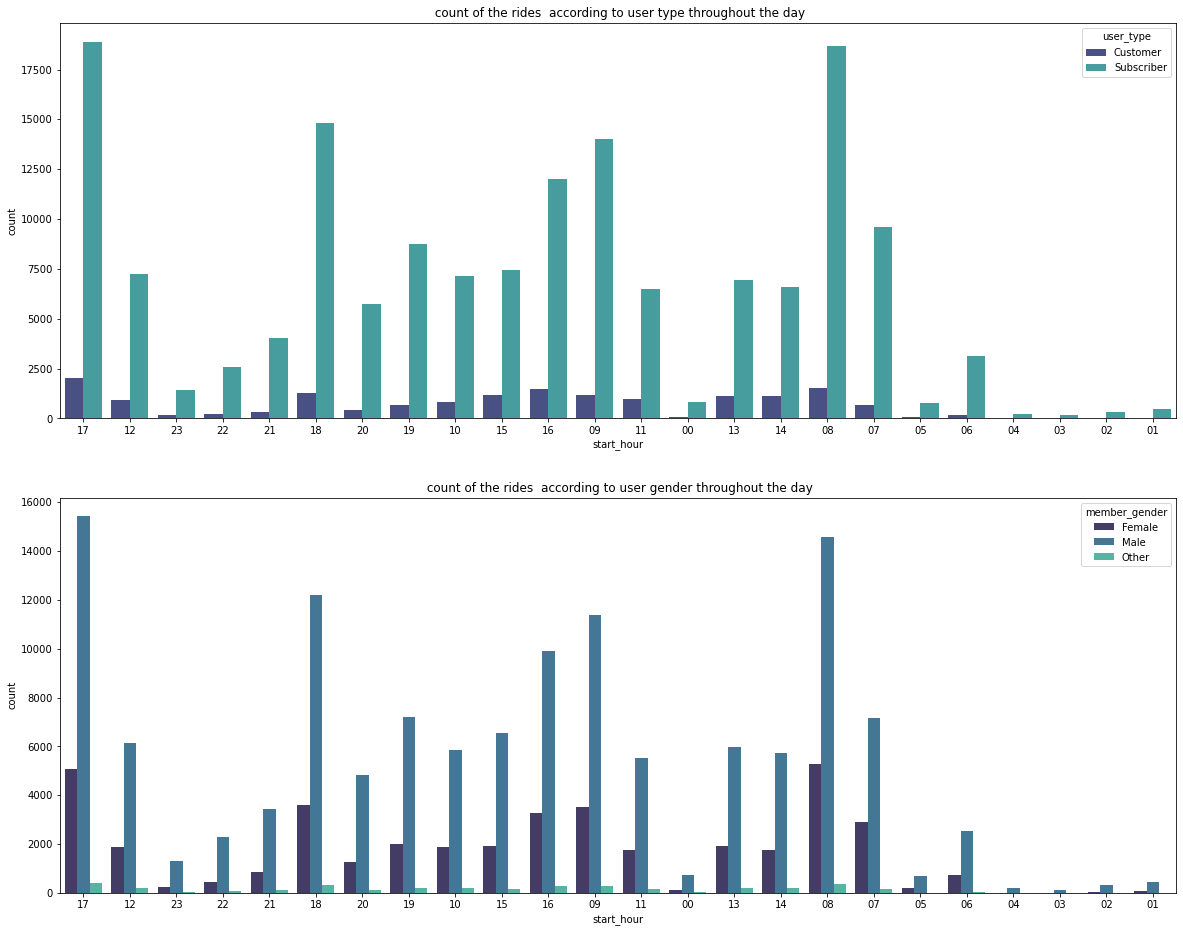

In [12]:
plt.figure(figsize = [20, 16]);

plt.subplot(2, 1, 1)
sb.countplot(data =bikes1 , x = 'start_hour', hue = 'user_type', palette = 'mako')
plt.title(' count of the rides  according to user type throughout the day')

plt.subplot(2, 1, 2)
sb.countplot(data = bikes1, x = 'start_hour', hue = 'member_gender', palette = 'mako')
plt.title(' count of the rides  according to user gender throughout the day');


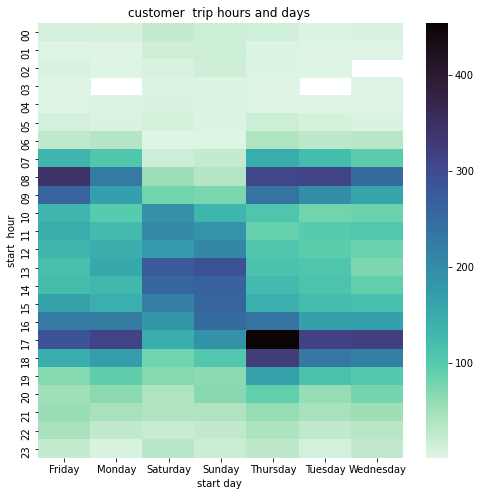

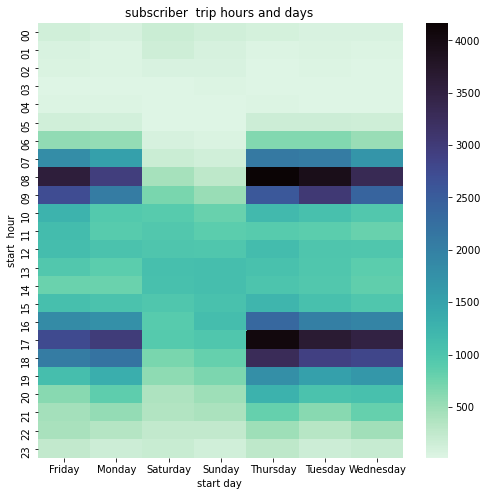

In [13]:
# reversing the  color bar 
color_map = plt.cm.get_cmap('mako')
reversed_color_map = color_map.reversed()
#first  sub heat map  for the customer user type
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)

customer = bikes1.query('user_type == "Customer"').groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
customer = customer.pivot('start_hour', 'start_day', 'bike_id')
heat1 = sb.heatmap(customer, cmap = reversed_color_map)

plt.title('customer  trip hours and days ')
plt.xlabel('start day ',)
plt.ylabel('start  hour');

plt.show()

# second  sub heat map for the subscriber  users 
plt.figure(figsize=(18,8))

plt.subplot(1,2,2)

subscriber = bikes1.query('user_type == "Subscriber"').groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
subscriber = subscriber.pivot('start_hour', 'start_day', 'bike_id')
heat2 = sb.heatmap(subscriber, cmap = reversed_color_map)

plt.title('subscriber  trip hours and days ')
plt.xlabel('start day ',)
plt.ylabel('start  hour');

plt.show()

# observations:
* most of the trips  were made by  subscriber  user type compared to  customers
* males tend to have  more   bike rides  compared  to females and  other gender  types
* max   bike rides made  during the  week is on  Thursday  followed by  Tuesday and wednesday
* the  min number of  rides is on the  weekends, namely Saturday and Sunday 
* customers tend to  have more   rides   in the weekends compared  to  subscribers, especially  between  10 am and  5 pm 

#   Features that affect  duration  of the trip:


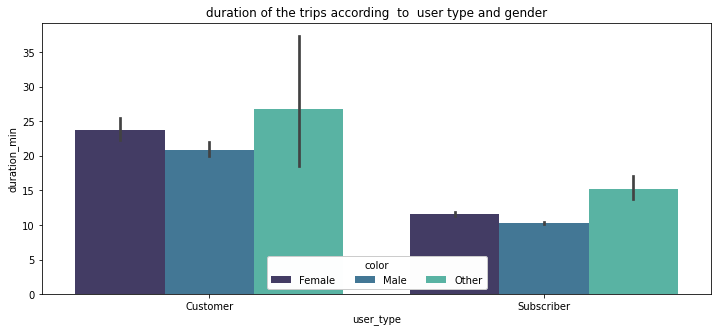

In [14]:
#duration of the trips according  to  user type and gender
plt.figure(figsize=(12,5))

ax = sb.barplot(data = bikes1, x = 'user_type', y = 'duration_min', hue = 'member_gender',palette='mako')
ax.legend(loc = 8, ncol = 7, framealpha = 2, title = 'color')
plt.title('duration of the trips according  to  user type and gender');

 customers  tend to have  more  rie duration  compared  to  subscribers  for all genders. Further, other  gender type  spends more  time in  rides  compared to other genders

Text(0.5, 1.0, 'duration of the trips according  to  gender of the users and  weekdays')

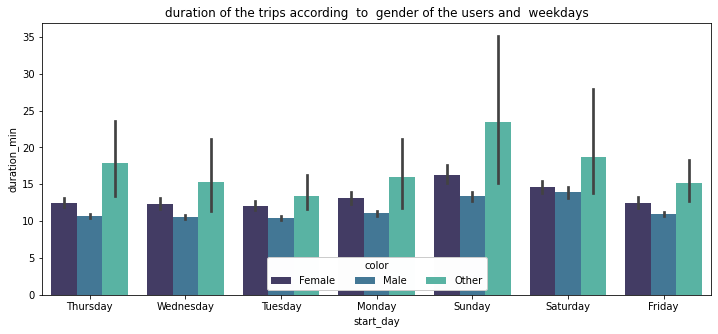

In [15]:
#duration of the trips according  to  gender of the users
plt.figure(figsize=(12,5))

ax = sb.barplot(data = bikes1, x = 'start_day', y = 'duration_min', hue = 'member_gender',palette='mako')
ax.legend(loc = 8, ncol = 7, framealpha = 2, title = 'color')
plt.title('duration of the trips according  to  gender of the users and  weekdays')

Other gender type  tend to have more  rides' duration  compared to   males  and females  for the whole week. Further,  weekends tend to have more  duration   compared to the work days

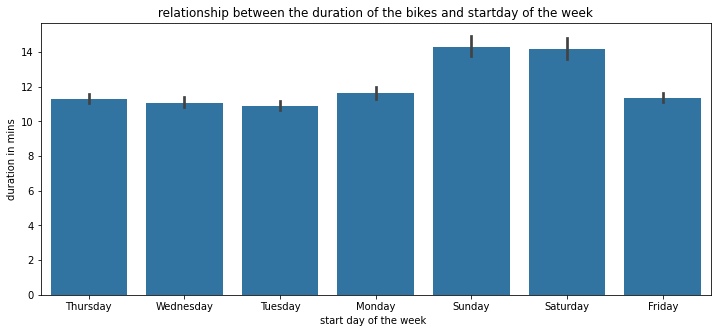

In [16]:
#relationship between the duration of the bikes and startday of the week
plt.figure(figsize=(12,5))
ax2=sb.barplot(data=bikes1, x='start_day', y='duration_min', color=color);


plt.xlabel('start day of the week  ')
plt.ylabel('duration in mins')
plt.title(' relationship between the duration of the bikes and startday of the week ');

# Observations:
*  Regarding gender, The  other  gender types  tend to  spend more  ride time  followed by females and then males
* user type:  customer  users  tend to spend more  time compared  to  subscribers
* start day: users tend to  have  more  ride duration  on weekends(Saturday and Sunday) compared to other weekdays

In [ ]:
!jupyter nbconvert slidedeck.ipynb --to slides --post serve  --no-input --no-prompt